# 2.4: Fundamentals of Visualization Libraries Part 2 - Seaborn

In [2]:
# Import Libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns
%matplotlib inline

In [5]:
# Define file paths
file_path_weather = r'C:\Users\north\OneDrive\Dokumente\Career Foundry\Data Visualization 2\Citi-Bike_Bike-Sharing\Data\merged_weather_trips.csv'
file_path_citibike = r'C:\Users\north\OneDrive\Dokumente\Career Foundry\Data Visualization 2\Citi-Bike_Bike-Sharing\Data\merged_citibike_weather.csv'

# Load the CSV files
weather_trips_df = pd.read_csv(file_path_weather)
citibike_weather_df = pd.read_csv(file_path_citibike, low_memory=False)


# Display the first few rows to confirm loading
print(weather_trips_df.head())
print(citibike_weather_df.head())


         date  avg_temp  trip_count
0  2022-01-01      11.6       20428
1  2022-01-02      11.4       43009
2  2022-01-03       1.4       33189
3  2022-01-04      -2.7       36842
4  2022-01-05       3.2       34230
            ride_id  rideable_type               started_at  \
0  70F3BA79664016C1   classic_bike  2022-02-28 09:22:49.821   
1  8FA3412A958122D0  electric_bike  2022-02-14 10:47:30.462   
2  0E2BA02AEAD03EB8  electric_bike  2022-02-18 22:26:55.796   
3  B626F8E1D7ABABBA   classic_bike  2022-02-09 18:38:18.621   
4  605E7CC493D08F3B  electric_bike  2022-02-06 14:52:48.564   

                  ended_at          start_station_name start_station_id  \
0  2022-02-28 09:28:55.174             9 Ave & W 18 St          6190.08   
1  2022-02-14 10:56:04.433    W 120 St & Claremont Ave          7745.07   
2  2022-02-18 22:44:31.472              E 4 St & 2 Ave          5593.04   
3  2022-02-09 18:47:11.274      White St & Johnson Ave          5099.03   
4  2022-02-06 14:55:56.218  S 

In [7]:
print(citibike_weather_df.dtypes)

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
start_date             object
start_time             object
end_date               object
end_time               object
date                   object
avg_temp              float64
_merge                 object
dtype: object


In [11]:
citibike_weather_df['started_at'] = pd.to_datetime(citibike_weather_df['started_at'])
citibike_weather_df['ended_at'] = pd.to_datetime(citibike_weather_df['ended_at'])
citibike_weather_df['start_date'] = pd.to_datetime(citibike_weather_df['start_date'])
citibike_weather_df['end_date'] = pd.to_datetime(citibike_weather_df['end_date'])

#### Create a bar chart of the top 20 starting stations frequencies

In [16]:
# Aggregate trip counts by starting station
top_stations = citibike_weather_df.groupby('start_station_name').size().reset_index(name='trip_count')

# Get the top 20 most frequent starting stations
top_stations = top_stations.nlargest(20, 'trip_count')


In [67]:
# Set the global theme and palette to 'BuGn_r'
sns.set_theme(style="darkgrid", palette="viridis")

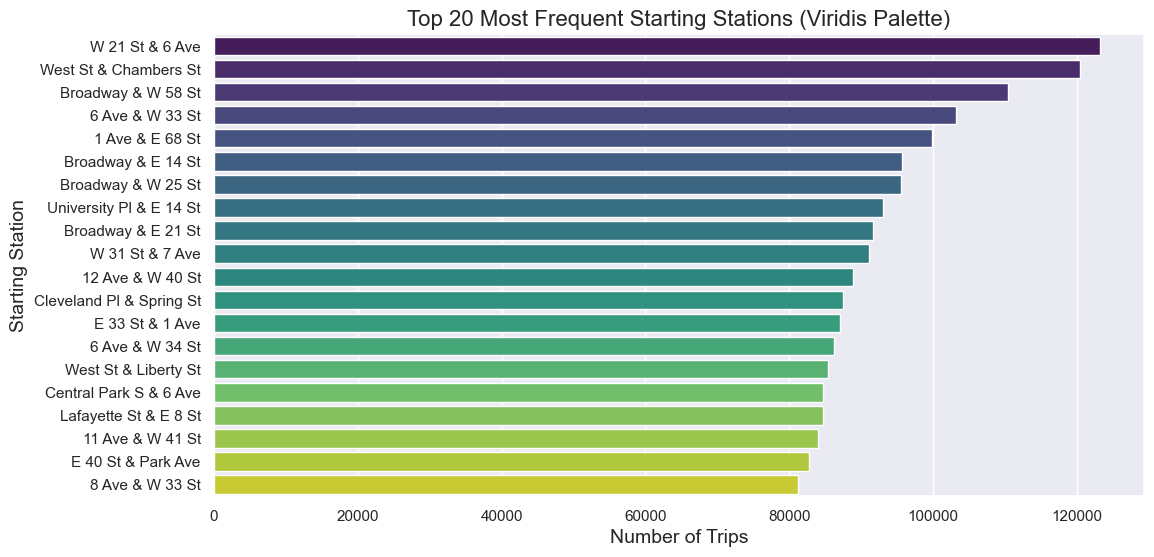

In [46]:
# Temporarily override the palette to ensure enough colors
plt.figure(figsize=(12, 6))
sns.barplot(data=top_stations, x='trip_count', y='start_station_name', palette="viridis")
plt.title('Top 20 Most Frequent Starting Stations (Viridis Palette)', fontsize=16)
plt.xlabel('Number of Trips', fontsize=14)
plt.ylabel('Starting Station', fontsize=14)

# Save the updated figure
plt.savefig("top_20_starting_stations_viridis.png", dpi=300, bbox_inches='tight')
plt.show()


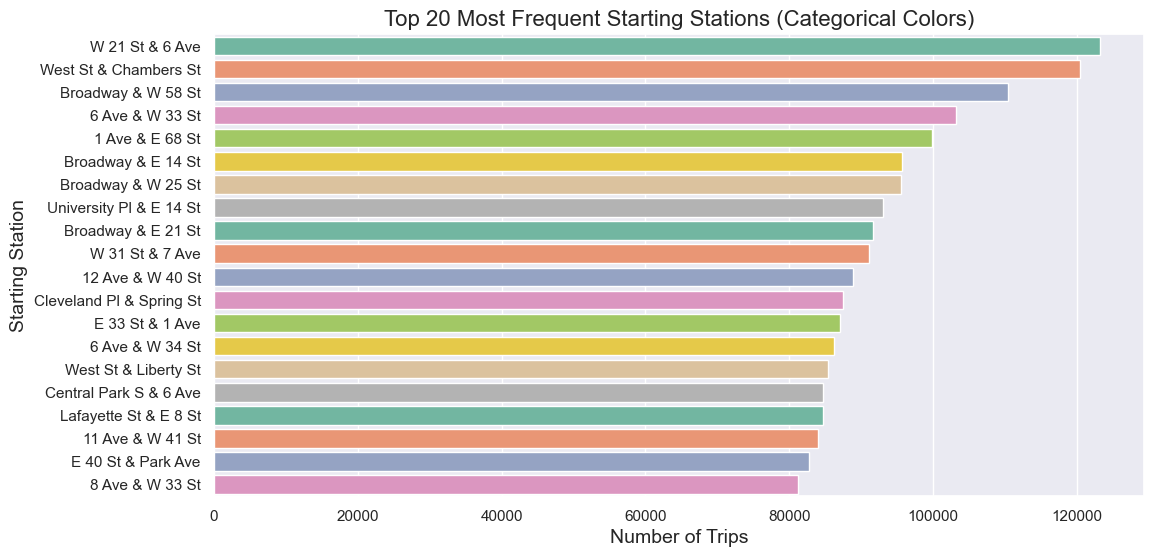

In [48]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_stations, x='trip_count', y='start_station_name', palette="Set2")  # Switch to a categorical palette
plt.title('Top 20 Most Frequent Starting Stations (Categorical Colors)', fontsize=16)
plt.xlabel('Number of Trips', fontsize=14)
plt.ylabel('Starting Station', fontsize=14)

# Save the figure
plt.savefig("top_20_starting_stations_categorical.png", dpi=300, bbox_inches='tight')
plt.show()


#### Dual-axis line plot with Seaborn

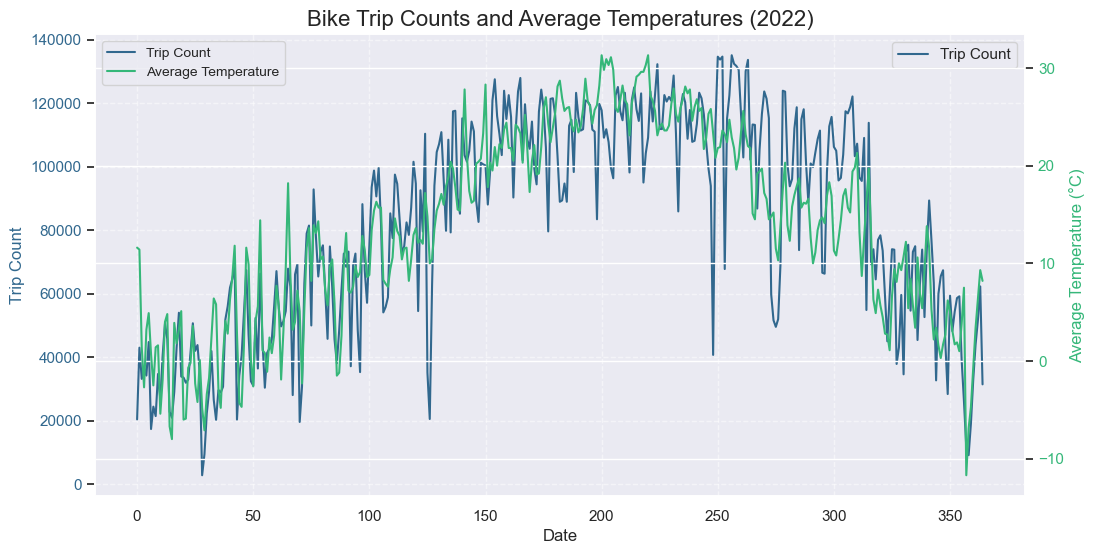

In [69]:
# Set the theme with the 'viridis' palette for consistency
sns.set_theme(style="darkgrid", palette="viridis")

# Create the figure and first axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Use BuGn_r colors for the lines
palette = sns.color_palette("viridis", n_colors=2)

# Plot trip counts on the first y-axis
sns.lineplot(data=weather_trips_df, x=weather_trips_df.index, y='trip_count', ax=ax1, color=palette[0], label='Trip Count')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Trip Count', color=palette[0], fontsize=12)
ax1.tick_params(axis='y', labelcolor=palette[0])

# Add a secondary y-axis for average temperature
ax2 = ax1.twinx()
sns.lineplot(data=weather_trips_df, x=weather_trips_df.index, y='avg_temp', ax=ax2, color=palette[1], label='Average Temperature')
ax2.set_ylabel('Average Temperature (°C)', color=palette[1], fontsize=12)
ax2.tick_params(axis='y', labelcolor=palette[1])

# Add a title and a grid
plt.title('Bike Trip Counts and Average Temperatures (2022)', fontsize=16)
ax1.grid(True, linestyle='--', alpha=0.5)

# Create a combined legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', fontsize=10)

# Save the plot to a file
plt.savefig("bike_trips_and_temperatures_viridis.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

#### Box Plot: Trip Duration by Bike Type (Classic vs. Electric)

In [74]:
# Ensure 'started_at' and 'ended_at' are in datetime format
citibike_weather_df['started_at'] = pd.to_datetime(citibike_weather_df['started_at'])
citibike_weather_df['ended_at'] = pd.to_datetime(citibike_weather_df['ended_at'])

# Calculate trip duration in minutes
citibike_weather_df['trip_duration'] = (citibike_weather_df['ended_at'] - citibike_weather_df['started_at']).dt.total_seconds() / 60


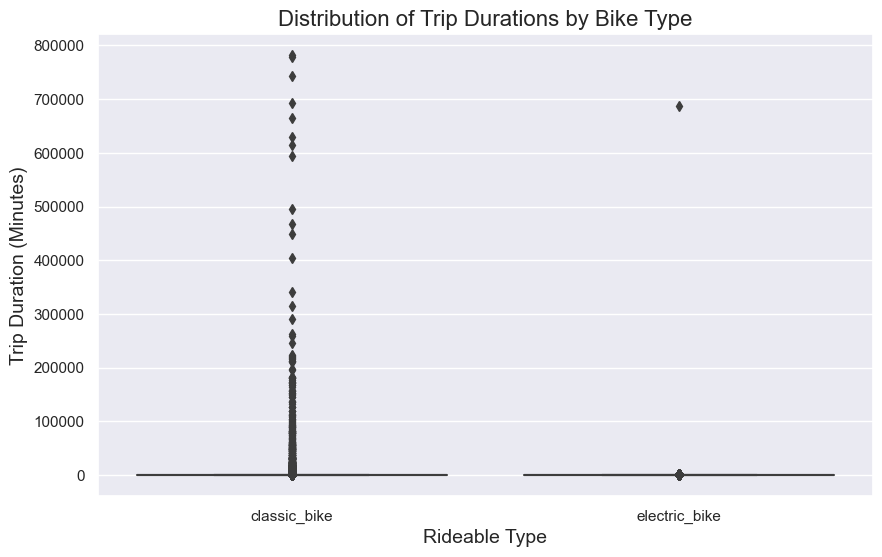

In [97]:
# Set the theme
sns.set_theme(style="darkgrid")

# Explicitly define colors for each bike type
custom_palette = {'classic_bike': '#1f77b4',  # Blue
                  'electric_bike': '#2ca02c'}  # Green

# Create the box plot with the explicit color mapping
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=citibike_weather_df,
    x='rideable_type',
    y='trip_duration',
    order=['classic_bike', 'electric_bike'],  # Ensure consistent category order
    palette=custom_palette  # Apply the explicit palette
)
plt.title('Distribution of Trip Durations by Bike Type', fontsize=16)
plt.xlabel('Rideable Type', fontsize=14)
plt.ylabel('Trip Duration (Minutes)', fontsize=14)

# Save the figure
plt.savefig("box_plot_trip_durations_final_colors.png", dpi=300, bbox_inches='tight')
plt.show()

This box plot shows the trip durations for classic bikes and electric bikes. The median trip duration for both bike types is similar, meaning users spend about the same amount of time on each. Classic bikes have more outliers, with some very long trips, which could mean they are used for extended rides or include errors in the data. Electric bikes, on the other hand, show fewer outliers and more consistent trip durations. Overall, both bike types have similar average usage, but classic bikes are more likely to have unusually long trips.

#### FacetGrid

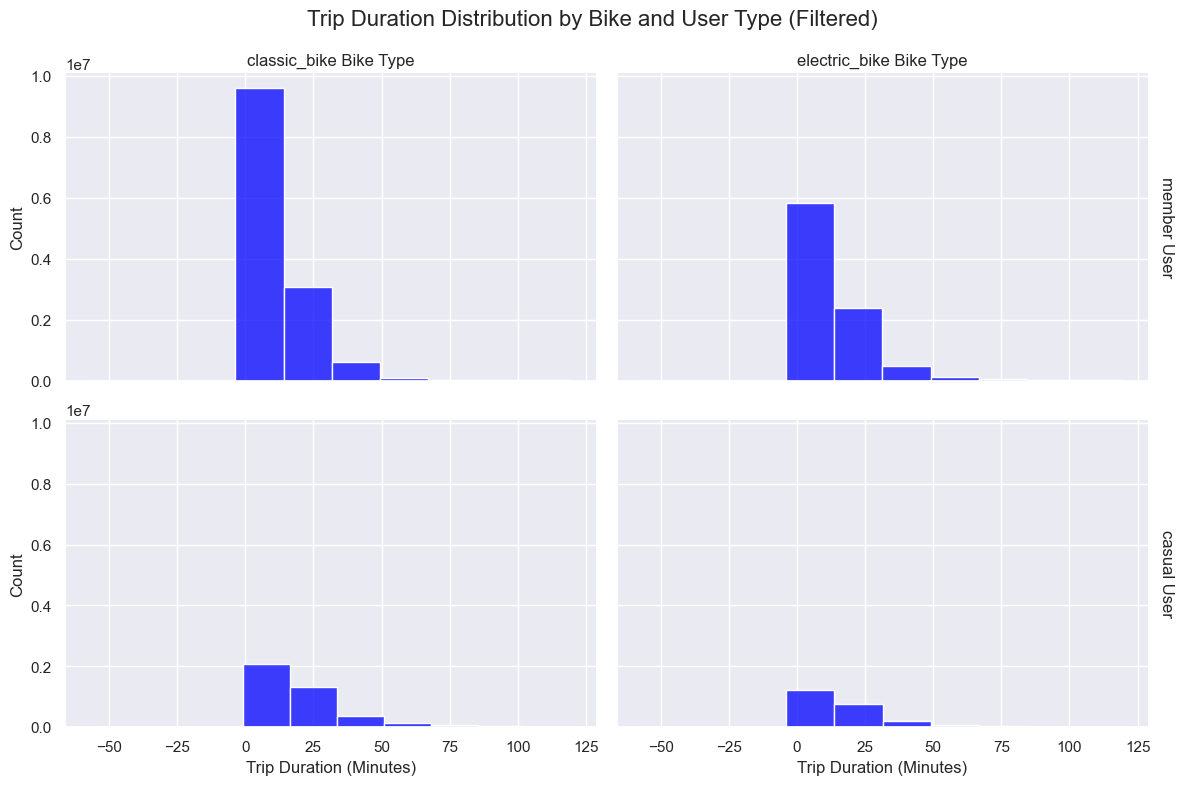

In [107]:
# Filtering range for trip durations
filtered_data = citibike_weather_df[citibike_weather_df['trip_duration'] <= 120]  # Include up to 2 hours

# Set the theme
sns.set_theme(style="darkgrid")

# Define the FacetGrid
g = sns.FacetGrid(
    filtered_data, 
    col="rideable_type", 
    row="member_casual", 
    height=4, 
    aspect=1.5, 
    margin_titles=True
)

# Plot trip durations for each subset
g.map(sns.histplot, "trip_duration", kde=False, bins=10, color="blue")

# Adjust grid properties
g.set_axis_labels("Trip Duration (Minutes)", "Count")
g.set_titles(row_template="{row_name} User", col_template="{col_name} Bike Type")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Trip Duration Distribution by Bike and User Type (Filtered)", fontsize=16)

# Save and display the plot
plt.savefig("filtered_trip_duration_distribution.png", dpi=300, bbox_inches='tight')
plt.show()


### Insights from the FacetGrid

The FacetGrid breaks down trip durations by bike type (`classic_bike` vs. `electric_bike`) and user type (`member` vs. `casual`), showing clear differences in how the bikes are used:

- **Members:** Take shorter, consistent trips with both bike types, likely for commuting or quick errands.
- **Casual Users:** Take slightly longer trips, especially with electric bikes, suggesting more recreational or exploratory use. 

### How This Helps the Analysis

This visualization provides useful insights for managing bike distribution:

- **Operational Adjustments:** Ensure enough electric bikes are available in recreational areas to support longer trips.
- **Resource Optimization:** Deploy more classic bikes to commuter-heavy stations to handle shorter, frequent trips.
